In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('mental_health_dataset.csv')

In [3]:
df.head()

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,Male,Employed,On-site,Yes,Yes,6,6.2,3,28,17,54,59.7,High
1,46,Female,Student,On-site,No,Yes,10,9.0,4,30,11,85,54.9,High
2,32,Female,Employed,On-site,Yes,No,7,7.7,2,24,7,62,61.3,Medium
3,60,Non-binary,Self-employed,On-site,No,No,4,4.5,4,6,0,95,97.0,Low
4,25,Female,Self-employed,On-site,Yes,Yes,3,5.4,0,24,12,70,69.0,High


In [4]:
gender = df['gender'].value_counts()
gender

gender
Male                 4557
Female               4457
Non-binary            520
Prefer not to say     466
Name: count, dtype: int64

In [5]:
df['gender']= df['gender'].map({'Male' : 1 , 'Female' : 2 , 'Non-binary' : 3 , 'Prefer not to say' : 4})

In [6]:
employmet = df['employment_status'].value_counts()
employmet

employment_status
Employed         5868
Student          2043
Self-employed    1045
Unemployed       1044
Name: count, dtype: int64

In [7]:
df['employment_status']= df['employment_status'].map({'Employed' : 1 , 'Student' : 2 , 'Self-employed' : 3 , 'Unemployed' : 4})

In [8]:
env = df['work_environment'].value_counts()
env

work_environment
On-site    5044
Remote     3009
Hybrid     1947
Name: count, dtype: int64

In [9]:
df['work_environment']= df['work_environment'].map({'On-site' : 1 , 'Remote' : 2 , 'Hybrid' : 3 })

In [10]:
df['mental_health_history']= df['mental_health_history'].map({'No' : 1 , 'Yes' : 2  })

In [11]:
df['seeks_treatment']= df['seeks_treatment'].map({'No' : 1 , 'Yes' : 2  })

In [12]:
df['mental_health_risk']= df['mental_health_risk'].map({'High' : 1 , 'Medium' : 2 ,'Low' : 3 })

In [13]:
df.head()

,age,gender,employment_status,work_environment,mental_health_history,seeks_treatment,stress_level,sleep_hours,physical_activity_days,depression_score,anxiety_score,social_support_score,productivity_score,mental_health_risk
0,56,1,1,1,2,2,6,6.2,3,28,17,54,59.7,1
1,46,2,2,1,1,2,10,9.0,4,30,11,85,54.9,1
2,32,2,1,1,2,1,7,7.7,2,24,7,62,61.3,2
3,60,3,3,1,1,1,4,4.5,4,6,0,95,97.0,3
4,25,2,3,1,2,2,3,5.4,0,24,12,70,69.0,1


In [14]:
df.columns

Index(['age', 'gender', 'employment_status', 'work_environment',
       'mental_health_history', 'seeks_treatment', 'stress_level',
       'sleep_hours', 'physical_activity_days', 'depression_score',
       'anxiety_score', 'social_support_score', 'productivity_score',
       'mental_health_risk'],
      dtype='object')

In [15]:
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.model_selection import train_test_split

In [16]:
X = df[['age', 'gender', 'employment_status', 'work_environment',
       'mental_health_history', 'seeks_treatment', 'stress_level',
       'sleep_hours', 'physical_activity_days', 'depression_score',
       'anxiety_score', 'social_support_score', 'productivity_score']]
y = df[['mental_health_risk']]

In [17]:
X_train , X_test , y_train , Y_test = train_test_split(X,y,test_size = 0.3)

In [18]:
model1 = RF(n_estimators = 500)

In [19]:
model1.fit(X_train,y_train)

C:\Users\hs298\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(n_estimators=500)

In [20]:
y_pred = model1.predict(X_test)

In [21]:
s1 = model1.score(X_test,Y_test)
s2 = model1.score(X_train,y_train)

In [22]:
s1

0.981

In [23]:
from sklearn.tree import DecisionTreeClassifier as DT
model2 = DT()

In [24]:
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [25]:
y_pr = model2.predict(X_test)  
dtscore = model2.score(X_test,Y_test)

In [26]:
dtscore

0.9993333333333333

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pr,Y_test)

<Axes: >

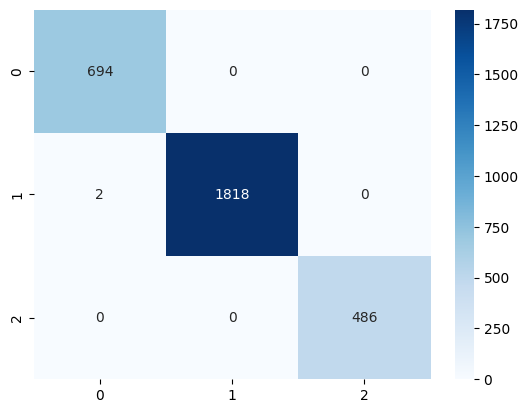

In [28]:
sns.heatmap(cm, annot = True , fmt = 'd',cmap = 'Blues')

In [33]:
from joblib import dump
dump(model1,'Mental_health.joblib')

['Mental_health.joblib']

In [30]:

import shap# Initialize SHAP explainer
explainer = shap.Explainer(model2, X)

# Calculate SHAP values
shap_values = explainer(X)

# Plot global feature importance
shap.plots.bar(shap_values)

# Plot feature impact for a single prediction (e.g., index 10)
shap.plots.waterfall(shap_values[10])


ModuleNotFoundError: No module named 'shap'

In [32]:
importances = model1.feature_importances_
for feature, score in zip(X.columns, importances):
    print(f"{feature}: {score:.4f}")


age: 0.0267
gender: 0.0082
employment_status: 0.0087
work_environment: 0.0075
mental_health_history: 0.0043
seeks_treatment: 0.0046
stress_level: 0.0173
sleep_hours: 0.0279
physical_activity_days: 0.0152
depression_score: 0.2978
anxiety_score: 0.3711
social_support_score: 0.0296
productivity_score: 0.1810


In [31]:
importances = model2.feature_importances_
for feature, score in zip(X.columns, importances):
    print(f"{feature}: {score:.4f}")


age: 0.0000
gender: 0.0000
employment_status: 0.0002
work_environment: 0.0000
mental_health_history: 0.0000
seeks_treatment: 0.0000
stress_level: 0.0000
sleep_hours: 0.0008
physical_activity_days: 0.0000
depression_score: 0.4988
anxiety_score: 0.4997
social_support_score: 0.0002
productivity_score: 0.0002
